In [2]:
%matplotlib inline
import pandas as pd

In [3]:
# Read the csv file into a pandas DataFrame
air_data = pd.read_csv('../data/clean_combinedatl.csv')
air_data.head()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,...,DEP_TIME,DEP_DELAY,DEP_DEL15,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,DISTANCE
0,0,2020,1,1,17,5,2020-01-17,Southwest Airlines,LAX,"Los Angeles, CA",...,1223.0,23.0,1.0,1238.0,1915.0,1920,1934.0,14.0,0.0,1947.0
1,1,2020,1,1,17,5,2020-01-17,Southwest Airlines,LAX,"Los Angeles, CA",...,644.0,-1.0,0.0,654.0,1333.0,1350,1339.0,-11.0,0.0,1947.0
2,2,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,1339.0,9.0,0.0,1401.0,1553.0,1610,1559.0,-11.0,0.0,762.0
3,3,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,956.0,-4.0,0.0,1013.0,1205.0,1255,1213.0,-42.0,0.0,762.0
4,4,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,1705.0,10.0,0.0,1723.0,1922.0,1945,1938.0,-7.0,0.0,762.0


In [4]:
delRank = air_data.groupby(['ORIGIN']).sum()['ARR_DEL15'].sort_values(ascending=False)
delRank.head(11)

ORIGIN
LGA    2373.0
ORD    1982.0
FLL    1889.0
MCO    1727.0
EWR    1588.0
DFW    1484.0
MIA    1456.0
BOS    1385.0
DEN    1379.0
DCA    1223.0
IAH    1223.0
Name: ARR_DEL15, dtype: float64

## Clean and prepare data

In [5]:
# delete any rows not in the top 10 arrival del count

mask = air_data['ORIGIN'].isin(['LGA','ORD','FLL','MCO','EWR','DFW','MIA','BOS','DEN','DCA'])
flights = air_data[mask]
flights.head()

,Unnamed: 0,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,ORIGIN,ORIGIN_CITY_NAME,...,DEP_TIME,DEP_DELAY,DEP_DEL15,WHEELS_OFF,WHEELS_ON,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,DISTANCE
2,2,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,1339.0,9.0,0.0,1401.0,1553.0,1610,1559.0,-11.0,0.0,762.0
3,3,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,956.0,-4.0,0.0,1013.0,1205.0,1255,1213.0,-42.0,0.0,762.0
4,4,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,1705.0,10.0,0.0,1723.0,1922.0,1945,1938.0,-7.0,0.0,762.0
5,5,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,2110.0,20.0,1.0,2138.0,2333.0,2330,2337.0,7.0,0.0,762.0
6,6,2020,1,1,17,5,2020-01-17,Southwest Airlines,LGA,"New York, NY",...,628.0,-2.0,0.0,658.0,853.0,910,859.0,-11.0,0.0,762.0


In [6]:
flights[['ORIGIN','DEST']]

,ORIGIN,DEST
2,LGA,ATL
3,LGA,ATL
4,LGA,ATL
5,LGA,ATL
6,LGA,ATL
...,...,...
523257,ORD,ATL
523258,EWR,ATL
523259,EWR,ATL
523260,EWR,ATL


In [7]:
flights.shape

(99102, 23)

In [7]:
# rows 99102 and columns 23)

In [8]:
flights.columns

Index(['Unnamed: 0', 'YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'FL_DATE', 'OP_UNIQUE_CARRIER', 'ORIGIN', 'ORIGIN_CITY_NAME', 'DEST',
       'DEST_CITY_NAME', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DEL15',
       'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DEL15', 'DISTANCE'],
      dtype='object')

In [9]:
# find missing values
flights.isnull().values.any()

True

In [10]:
flights.isnull().sum()

Unnamed: 0              0
YEAR                    0
QUARTER                 0
MONTH                   0
DAY_OF_MONTH            0
DAY_OF_WEEK             0
FL_DATE                 0
OP_UNIQUE_CARRIER       0
ORIGIN                  0
ORIGIN_CITY_NAME        0
DEST                    0
DEST_CITY_NAME          0
CRS_DEP_TIME            0
DEP_TIME             3020
DEP_DELAY            3020
DEP_DEL15            3020
WHEELS_OFF           3053
WHEELS_ON            3059
CRS_ARR_TIME            0
ARR_TIME             3059
ARR_DELAY            3212
ARR_DEL15            3212
DISTANCE                0
dtype: int64

Filter out columns that are not relavent to a predictitive model.

In [12]:
fltData=flights[["MONTH","DAY_OF_MONTH","DAY_OF_WEEK","ORIGIN","CRS_DEP_TIME","ARR_DEL15"]]
fltData.isnull().sum()

MONTH              0
DAY_OF_MONTH       0
DAY_OF_WEEK        0
ORIGIN             0
CRS_DEP_TIME       0
ARR_DEL15       3212
dtype: int64

**ArrDel15 shows NaN for diverted or cancelled flights

In [13]:
fltData[fltData.isnull().values.any(axis=1)].head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,CRS_DEP_TIME,ARR_DEL15
113,1,17,5,ORD,1755,NaN
414,1,11,6,ORD,1710,NaN
420,1,17,5,ORD,1710,NaN
648,1,5,7,MIA,600,NaN
7538,1,11,6,ORD,1416,NaN


In [14]:
fltData = fltData.fillna({'ARR_DEL15':1})

In [16]:
row1 = fltData.loc[113:114]
row1

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,CRS_DEP_TIME,ARR_DEL15
113,1,17,5,ORD,1755,1.0
114,1,20,1,ORD,1755,0.0


In [17]:
import math
for index, row in fltData.iterrows():
    fltData.loc[index,'CRS_DEP_TIME'] = math.floor(row['CRS_DEP_TIME']/100)

In [18]:
fltData.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,CRS_DEP_TIME,ARR_DEL15
2,1,17,5,LGA,13,0.0
3,1,17,5,LGA,10,0.0
4,1,17,5,LGA,16,0.0
5,1,17,5,LGA,20,0.0
6,1,17,5,LGA,6,0.0


In [21]:
newData = pd.get_dummies(fltData, columns=['ORIGIN'])


In [22]:
newData.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_DEP_TIME,ARR_DEL15,ORIGIN_BOS,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_EWR,ORIGIN_FLL,ORIGIN_LGA,ORIGIN_MCO,ORIGIN_MIA,ORIGIN_ORD
2,1,17,5,13,0.0,0,0,0,0,0,0,1,0,0,0
3,1,17,5,10,0.0,0,0,0,0,0,0,1,0,0,0
4,1,17,5,16,0.0,0,0,0,0,0,0,1,0,0,0
5,1,17,5,20,0.0,0,0,0,0,0,0,1,0,0,0
6,1,17,5,6,0.0,0,0,0,0,0,0,1,0,0,0


In [23]:
newData.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'CRS_DEP_TIME', 'ARR_DEL15',
       'ORIGIN_BOS', 'ORIGIN_DCA', 'ORIGIN_DEN', 'ORIGIN_DFW', 'ORIGIN_EWR',
       'ORIGIN_FLL', 'ORIGIN_LGA', 'ORIGIN_MCO', 'ORIGIN_MIA', 'ORIGIN_ORD'],
      dtype='object')

**Build Machine Learning Model

In [31]:
trainingData = train_test_split(newData.drop('ARR_DEL15',axis=1),newData['ARR_DEL15'],test_size=0.2,random_state=42)


AttributeError: 'list' object has no attribute 'head'

In [24]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(newData.drop('ARR_DEL15',axis=1),newData['ARR_DEL15'],test_size=0.2,random_state=42)

In [25]:
print(train_x.shape)
print(test_x.shape)

(79281, 14)
(19821, 14)


In [26]:
print(train_y.shape)
print(test_y.shape)

(79281,)
(19821,)


In [27]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=13)
model.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)

In [28]:
predicted = model.predict(test_x)
model.score(test_x, test_y)

0.8040966651531204

In [25]:
test_x.head()

,MONTH,DAY_OF_MONTH,CRS_DEP_TIME,ORIGIN_BOS,ORIGIN_DCA,ORIGIN_DEN,ORIGIN_DFW,ORIGIN_EWR,ORIGIN_FLL,ORIGIN_LGA,ORIGIN_MCO,ORIGIN_MIA,ORIGIN_ORD
384820,5,21,13,0,0,0,0,0,0,1,0,0,0
236526,12,22,17,0,0,0,0,0,0,0,1,0,0
407221,6,9,7,0,0,0,0,0,0,1,0,0,0
354301,5,11,8,0,0,0,0,0,0,0,1,0,0
183891,10,10,15,0,0,0,0,0,0,0,0,0,1


In [26]:
from sklearn.metrics import roc_auc_score
probabilities = model.predict_proba(test_x)

In [27]:
roc_auc_score(test_y, probabilities[:,1])

0.681665739936869

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, predicted)

array([[14127,  1757],
       [ 2811,  1126]], dtype=int64)

In [29]:
from sklearn.metrics import precision_score

train_predictions = model.predict(train_x)
precision_score(train_y, train_predictions)

0.8517292735396327

In [30]:
from sklearn.metrics import recall_score
recall_score(train_y, train_predictions)

0.6531311465008566

# Visualize Output of Model

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

Text(0, 0.5, 'True Positive Rate')

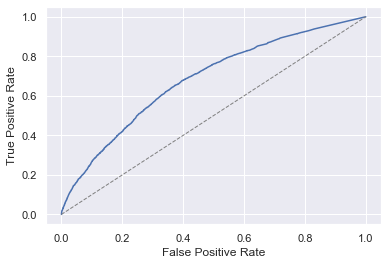

In [32]:
from sklearn.metrics import roc_curve

fpr, tpr, _= roc_curve(test_y, probabilities[:,1])
plt.plot(fpr ,tpr)
plt.plot([0,1], [0,1], color='grey', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [33]:
test_x.columns

Index(['MONTH', 'DAY_OF_MONTH', 'CRS_DEP_TIME', 'ORIGIN_BOS', 'ORIGIN_DCA',
       'ORIGIN_DEN', 'ORIGIN_DFW', 'ORIGIN_EWR', 'ORIGIN_FLL', 'ORIGIN_LGA',
       'ORIGIN_MCO', 'ORIGIN_MIA', 'ORIGIN_ORD'],
      dtype='object')

In [34]:
def predict_delay(departure_date_time, origin):
    from datetime import datetime
    
    try:
        departure_date_time_parsed = datetime.strptime(departure_date_time, '%d/%m/%Y %H:%M:%S')
    except ValueError as e:
        return 'Error parsing date/time - {}'.format(e)
    
    month = departure_date_time_parsed.month
    day = departure_date_time_parsed.day
 #   day_of_week = departure_date_time_parsed.isoweekday()
    hour = departure_date_time_parsed.hour
    
    orign = origin.upper()
#    destination = destination.upper()
    
    input = [{'MONTH':month,
              'DAY_OF_MONTH': day,
 #             'DayOfWeek': day_of_week,
              'CRS_DEP_TIME': hour,
              'ORIGIN_BOS': 1 if origin == 'BOS' else 0,
              'ORIGIN_DCA': 1 if origin == 'DCA' else 0,
              'ORIGIN_DEN': 1 if origin == 'DEN' else 0,
              'ORIGIN_DFW': 1 if origin == 'DFW' else 0,
              'ORIGIN_EWR': 1 if origin == 'EWR' else 0,
              'ORIGIN_FLL': 1 if origin == 'FLL' else 0,
              'ORIGIN_LGA': 1 if origin == 'LGA' else 0,
              'ORIGIN_MCO': 1 if origin == 'MCO' else 0,
              'ORIGIN_MIA': 1 if origin == 'MIA' else 0,
              'ORIGIN_ORD': 1 if origin == 'ORD' else 0
             
        
    }]
    
    return model.predict_proba(pd.DataFrame(input))[0][0]
    
    
                                                       

In [35]:
# Date input to the predict_delay function use the internation date format dd/mm/year.
predict_delay('24/10/2020 15:00:00','BOS')

0.98

(0.0, 1.0)

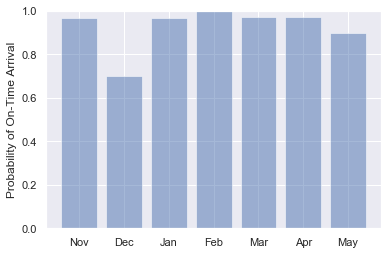

In [36]:
import numpy as np
labels = ('Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May')
values = (predict_delay('01/11/2020 15:00:00','BOS'),
          predict_delay('01/12/2020 15:00:00','BOS'),
          predict_delay('01/01/2021 15:00:00','BOS'),
          predict_delay('01/02/2021 15:00:00','BOS'),
          predict_delay('01/03/2021 15:00:00','BOS'),
          predict_delay('01/04/2021 15:00:00','BOS'),
          predict_delay('01/05/2021 15:00:00','BOS'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels,labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))

(0.0, 1.0)

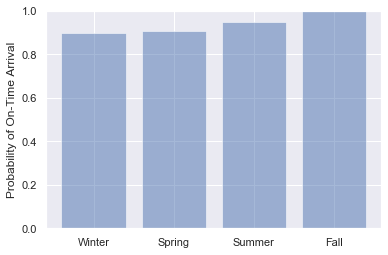

In [37]:
import numpy as np
labels = ('Winter', 'Spring', 'Summer', 'Fall')
values = (predict_delay('21/12/2020 15:00:00','BOS'),
          predict_delay('21/03/2021 15:00:00','BOS'),
          predict_delay('21/06/2021 15:00:00','BOS'),
          predict_delay('21/09/2021 15:00:00','BOS'))
alabels = np.arange(len(labels))

plt.bar(alabels, values, align='center', alpha=0.5)
plt.xticks(alabels,labels)
plt.ylabel('Probability of On-Time Arrival')
plt.ylim((0.0, 1.0))